In [1]:
import numpy as np
import cv2

from feature_tracker import FeatureTrackerTypes, FeatureTracker, FeatureTrackingResult
from feature_orb2D import OrbFeature2D
from feature_matcher import feature_matcher_factory, FeatureMatcherTypes
from parameters import Parameters 
import random
import tracemalloc
import linecache
from visual_odometry import ImageRecievedState, VisualOdometry
from camera import KinectCamera
from utils import compute_euler_angle

In [2]:
import time

In [3]:
MinNumFeatureDefault = Parameters.MinNumFeatureDefault
RatioTest = Parameters.FeatureMatchRatioTest
t = np.load("102/0/translations.npy")
r = np.load("102/0/rotationsM.npy")
z = np.load("102/0/depth.npy")

width  = 640
height = 480
fx     = 554.254691191187
fy     = 554.254691191187
cx     = 320.5
cy     = 240.5
D      = [0.0, 0.0, 0.0, 0.0, 0.0] 

cam = KinectCamera(width, height, fx, fy, cx, cy, D)

feature_tracker = FeatureTracker(num_features=MinNumFeatureDefault, 
                       num_levels = 8,  
                       scale_factor = 1.2,   
                       match_ratio_test = RatioTest, 
                       tracker_type = FeatureTrackerTypes.DES_BF)

Using Orb Feature 2D


In [4]:
path = "102/image_0.jpg"
img = cv2.imread(path,0)

In [9]:
imgn = np.array(cam.unproject_points_z(uv, z[1]))

In [12]:
imgn.shape

(146, 3)

In [36]:
x=[]
y=[]
z=[]
for a in imgn:
    x.append(a[0])
    y.append(a[1])
    z.append(a[2])

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

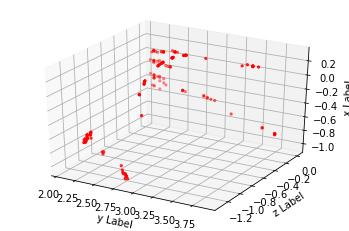

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z, x, y, c='r', marker='.')

ax.set_xlabel('y Label')
ax.set_ylabel('z Label')
ax.set_zlabel('x Label')

plt.show()

In [8]:
uv = vo.track_result.kps_cur_matched

In [5]:
vo = VisualOdometry(cam, feature_tracker, t, r)

In [6]:
path = "102/image_0.jpg"
img = cv2.imread(path)
vo.trackImage(img,0)

processing first frame


In [42]:
co = compute_euler_angle(vo.cur_R)

In [26]:
l=vo.trans_est_ref

In [44]:
co

array([-2.20714291,  0.07541841, -2.99230222])

In [29]:
l

[[array([0.]), array([0.]), array([0.])],
 [array([0.57735027]), array([-0.57735027]), array([0.57735027])]]

In [48]:
vo.cur_t/10

array([[ 0.13394161],
       [-0.33630305],
       [-0.06954336]])

In [7]:
path = "102/image_1.jpg"
img = cv2.imread(path)
vo.trackImage(img,1)

processing 1 frame
# matched points:  332 , # inliers:  328


In [19]:
im = vo.draw_img

In [20]:
cv2.imwrite("ii.jpg",im)

True

In [110]:
path = "101/image_2.jpg"
img = cv2.imread(path)
vo.trackImage(img,2)

processing 2 frame
# matched points:  505 , # inliers:  493


In [149]:
for i in range(5):
    path = "101/image_"+str(i)+".jpg"
    img = cv2.imread(path)
    vo.trackImage(img,i)

processing first frame
processing 1 frame
# matched points:  538 , # inliers:  530
processing 2 frame
# matched points:  505 , # inliers:  493
processing 3 frame
# matched points:  469 , # inliers:  453
processing 4 frame
# matched points:  516 , # inliers:  504


In [88]:
p=vo.trans_est_ref

In [90]:
p=np.round(np.reshape(p, (66,3)),2)

In [91]:
p=p/10

In [5]:

start = time.time()
for i in range(300):
    print(i)
    path = "101/image_"+str(i)+".jpg"
    img = cv2.imread(path)
    if img is not None:
        vo.trackImage(img, i)
    else: print("image is not read")
end = time.time()

print("time elapsed: ", end-start)
    

0
processing first frame
1
processing 1 frame
# matched points:  538 , # inliers:  530
2
processing 2 frame
# matched points:  505 , # inliers:  493
3
processing 3 frame
# matched points:  469 , # inliers:  453
4
processing 4 frame
# matched points:  516 , # inliers:  504
5
processing 5 frame
# matched points:  509 , # inliers:  493
6
processing 6 frame
# matched points:  495 , # inliers:  476
7
processing 7 frame
# matched points:  277 , # inliers:  215
8
processing 8 frame
# matched points:  308 , # inliers:  224
9
processing 9 frame
# matched points:  297 , # inliers:  193
10
processing 10 frame
# matched points:  347 , # inliers:  286
11
processing 11 frame
# matched points:  316 , # inliers:  242
12
processing 12 frame
# matched points:  271 , # inliers:  194
13
processing 13 frame
# matched points:  322 , # inliers:  251
14
processing 14 frame
# matched points:  312 , # inliers:  240
15
processing 15 frame
# matched points:  307 , # inliers:  226
16
processing 16 frame
# matched 

# matched points:  629 , # inliers:  191
129
processing 129 frame
# matched points:  781 , # inliers:  272
130
processing 130 frame
# matched points:  1041 , # inliers:  828
131
processing 131 frame
# matched points:  975 , # inliers:  466
132
processing 132 frame
# matched points:  999 , # inliers:  640
133
processing 133 frame
# matched points:  996 , # inliers:  678
134
processing 134 frame
# matched points:  1016 , # inliers:  688
135
processing 135 frame
# matched points:  1003 , # inliers:  673
136
processing 136 frame
# matched points:  1022 , # inliers:  711
137
processing 137 frame
# matched points:  1052 , # inliers:  750
138
processing 138 frame
# matched points:  1016 , # inliers:  633
139
processing 139 frame
# matched points:  1041 , # inliers:  732
140
processing 140 frame
# matched points:  1017 , # inliers:  663
141
processing 141 frame
# matched points:  1022 , # inliers:  656
142
processing 142 frame
# matched points:  1001 , # inliers:  697
143
processing 143 frame


# matched points:  457 , # inliers:  351
253
processing 253 frame
# matched points:  443 , # inliers:  348
254
processing 254 frame
# matched points:  432 , # inliers:  315
255
processing 255 frame
# matched points:  446 , # inliers:  346
256
processing 256 frame
# matched points:  456 , # inliers:  344
257
processing 257 frame
# matched points:  444 , # inliers:  316
258
processing 258 frame
# matched points:  445 , # inliers:  331
259
processing 259 frame
# matched points:  438 , # inliers:  327
260
processing 260 frame
# matched points:  424 , # inliers:  317
261
processing 261 frame
# matched points:  407 , # inliers:  297
262
processing 262 frame
# matched points:  408 , # inliers:  300
263
processing 263 frame
# matched points:  407 , # inliers:  304
264
processing 264 frame
# matched points:  411 , # inliers:  319
265
processing 265 frame
# matched points:  377 , # inliers:  250
266
processing 266 frame
# matched points:  410 , # inliers:  340
267
processing 267 frame
# matched 

In [53]:
p = vo.trans_est_ref2

In [30]:
t_xzy = []

for i in range(len(t)):
    t_xzy.append([t[i][0],t[i][2],t[i][1]])

In [51]:
t[:280]

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.019, -0.003,  0.   ],
       [ 0.039, -0.007,  0.   ],
       [ 0.06 , -0.01 ,  0.   ],
       [ 0.077, -0.013,  0.   ],
       [ 0.101, -0.017,  0.   ],
       [ 0.119, -0.02 ,  0.   ],
       [ 0.136, -0.023,  0.   ],
       [ 0.156, -0.026,  0.   ],
       [ 0.178, -0.03 ,  0.   ],
       [ 0.198, -0.034,  0.   ],
       [ 0.217, -0.037,  0.   ],
       [ 0.238, -0.041,  0.   ],
       [ 0.257, -0.044,  0.   ],
       [ 0.277, -0.047,  0.   ],
       [ 0.296, -0.051,  0.   ],
       [ 0.316, -0.054,  0.   ],
       [ 0.337, -0.058,  0.   ],
       [ 0.358, -0.062,  0.   ],
       [ 0.374, -0.065,  0.   ],
       [ 0.396, -0.069,  0.   ],
       [ 0.411, -0.071,  0.   ],
       [ 0.437, -0.076,  0.   ],
       [ 0.456, -0.079,  0.   ],
       [ 0

In [ ]:
t_xzy = np.round(t_xzy,2)
t_xzy[:54]

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
x = []
y = []

for i in range(66):
    x.append(p[i][0])
    y.append(p[i][1])
    

In [ ]:
xn = []
yn = []

for i in range(200):
    xn.append(((p[i][0])+(t[i][0]))/2)
    yn.append(((p[i][1])+(t[i][1]))/2)
    

In [93]:
x_t = []
y_t = []

for i in range(66):
    x_t.append(t[i][0])
    y_t.append(t[i][1])

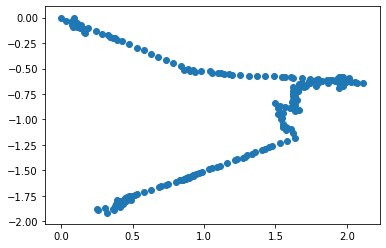

In [60]:
plt.scatter(xn, yn)
plt.show()

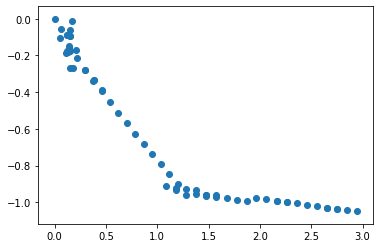

In [94]:
plt.scatter(x, y)
plt.show()

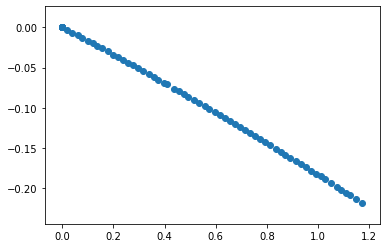

In [95]:
plt.scatter(x_t, y_t)
plt.show()

In [97]:
c = compute_euler_angle(vo.cur_R)

In [98]:
c

array([1.1353185 , 0.01137473, 2.94796369])

In [16]:
def display_top(snapshot, key_type='lineno', limit=10):
    snapshot = snapshot.filter_traces((
        tracemalloc.Filter(False, "<frozen importlib._bootstrap>"),
        tracemalloc.Filter(False, "<unknown>"),
    ))
    top_stats = snapshot.statistics(key_type)

    print("Top %s lines" % limit)
    for index, stat in enumerate(top_stats[:limit], 1):
        frame = stat.traceback[0]
        print("#%s: %s:%s: %.1f KiB"
              % (index, frame.filename, frame.lineno, stat.size / 1024))
        line = linecache.getline(frame.filename, frame.lineno).strip()
        if line:
            print('    %s' % line)

    other = top_stats[limit:]
    if other:
        size = sum(stat.size for stat in other)
        print("%s other: %.1f KiB" % (len(other), size / 1024))
    total = sum(stat.size for stat in top_stats)
    print("Total allocated size: %.1f KiB" % (total / 1024))


In [16]:
vo.trans_est

array([[ 0.78281471],
       [-0.0212825 ],
       [ 0.62189081]])

In [15]:
cv2.imwrite("Images/current.jpg", img2)

True

In [17]:
print(vo.cur_R)

[[ 0.99959432  0.00204117  0.02840809]
 [-0.00209109  0.99999632  0.00172741]
 [-0.02840446 -0.00178611  0.99959492]]


In [11]:
print(vo.cur_t)

[[ 0.78281471]
 [-0.0212825 ]
 [ 0.62189081]]


In [64]:
a,b = None, None

In [21]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])]]

In [32]:
compute_euler_angle(vo.cur_R)

array([-0.00492516,  0.0938872 , -0.01327321])

In [12]:
vo.trackImage(image_2)

processing second frame
# matched points:  55 , # inliers:  19


In [13]:
img2 = vo.draw_img
cv2.imwrite("Images/res/image2.jpg", img2)

True

In [16]:
vo.cur_t

array([[1.18445052],
       [0.05603373],
       [1.53442075]])

In [19]:
vo.poses[0]

array([[ 0.99959432,  0.00204117,  0.02840809,  0.        ],
       [-0.00209109,  0.99999632,  0.00172741,  0.        ],
       [-0.02840446, -0.00178611,  0.99959492,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [20]:
vo.poses[1]

array([[ 9.98023904e-01, -3.12445700e-04,  6.28346193e-02,
         4.01635806e-01],
       [ 9.73925527e-04,  9.99944431e-01, -1.04969621e-02,
         7.73162345e-02],
       [-6.28278480e-02,  1.05374154e-02,  9.97968749e-01,
         9.12529933e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [26]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])],
 [array([0.40163581]), array([0.07731623]), array([0.91252993])]]

In [22]:
vo.cur_t

array([[1.18445052],
       [0.05603373],
       [1.53442075]])

In [23]:
vo.cur_R

array([[ 9.98023904e-01, -3.12445700e-04,  6.28346193e-02],
       [ 9.73925527e-04,  9.99944431e-01, -1.04969621e-02],
       [-6.28278480e-02,  1.05374154e-02,  9.97968749e-01]])

In [27]:
vo.trackImage(image_3)

processing second frame
# matched points:  50 , # inliers:  15


In [28]:
img2 = vo.draw_img
cv2.imwrite("Images/res/image2.jpg", img2)

True

In [29]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])],
 [array([0.40163581]), array([0.07731623]), array([0.91252993])],
 [array([0.95375506]), array([-0.00526277]), array([1.74219555])]]

In [30]:
vo.cur_t

array([[ 1.73656977],
       [-0.02654527],
       [ 2.36408636]])

In [31]:
vo.cur_R

array([[ 0.99550813,  0.01321437,  0.09374933],
       [-0.01373435,  0.99989366,  0.00490345],
       [-0.09367457, -0.00616901,  0.99558376]])

In [34]:
img3 = vo.draw_img
cv2.imwrite("Images/res/image3.jpg", img3)

True

In [65]:
r

array([[-0.   , -0.   , -1.678],
       [-0.   , -0.   , -1.679],
       [-0.   , -0.   , -1.68 ],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.682],
       [-0.   , -0.   , -1.68 ],
       [-0.   , -0.   , -1.677],
       [-0.   , -0.   , -1.679],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.683],
       [-0.   , -0.   , -1.685],
       [-0.   , -0.   , -1.687],
       [-0.   , -0.   , -1.689],
       [-0.   , -0.   , -1.691],
       [-0.   , -0.   , -1.694],
       [-0.   , -0.   , -1.695],
       [-0.   , -0.   , -1.696],
       [-0.   , -0.   , -1.651],
       [-0.   , -0.   , -1.466],
       [-0.   , -0.   , -1.304],
       [-0.   , -0.   , -1.136],
       [-0.   , -0.   , -0.961],
       [-0.   , -0.   , -0.806],
       [-0.   , -0.   , -0.634],
       [-0.   , -0.   , -0.472],
       [-0.   , -0.   , -0.31 ],
       [-0.   , -0.   , -0.182],
       [ 0.   , -0.   ,  0.018],
       [ 0